In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

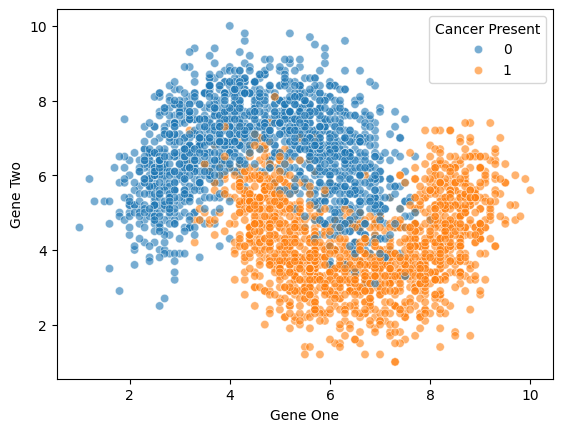

In [11]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.6)

In [7]:
len(df)

3000

(4.0, 8.0)

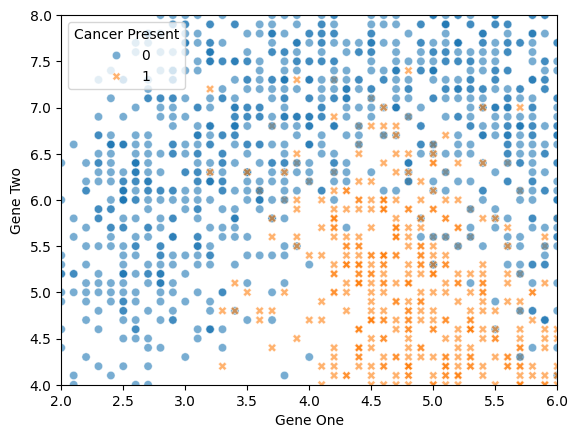

In [13]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.6, style='Cancer Present')
plt.xlim(2, 6)
plt.ylim(4, 8)

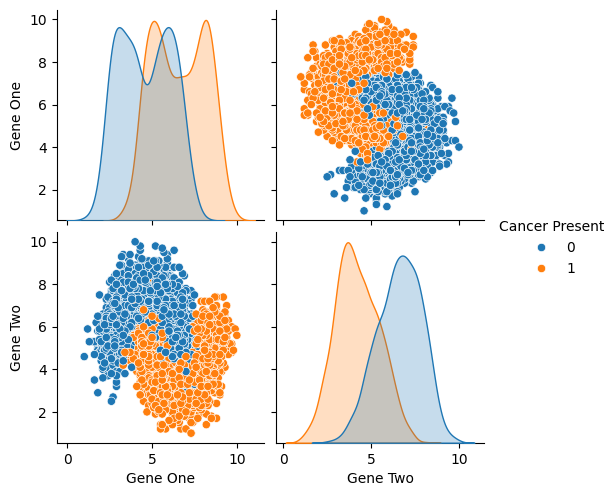

In [15]:
sns.pairplot(data=df, hue='Cancer Present')

In [16]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [10]:
X

,Gene One,Gene Two
0,4.3,3.9
1,2.5,6.3
2,5.7,3.9
3,6.1,6.2
4,7.4,3.4
...,...,...
2995,5.0,6.5
2996,3.4,6.6
2997,2.7,6.5
2998,3.3,5.6


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
scaler = StandardScaler()

In [22]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
#help(KNeighborsClassifier)

In [34]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [35]:
knn_model.fit(scaled_X_train, y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [36]:
y_pred = knn_model.predict(scaled_X_test)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [38]:
confusion_matrix(y_test, y_pred)

array([[426,  44],
       [ 45, 385]])

In [39]:
len(y_test)

900

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



In [41]:
df['Cancer Present'].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

In [43]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test, y_pred)
#accuracy of the k=1 knn model

0.9011111111111111

In [46]:
test_error_rates = []

for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rates.append(test_error)

In [48]:
test_error_rates

[0.09888888888888892,
 0.09777777777777774,
 0.07333333333333336,
 0.0755555555555556,
 0.07222222222222219,
 0.06444444444444442,
 0.06444444444444442,
 0.061111111111111116,
 0.05777777777777782,
 0.06222222222222218,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218,
 0.05888888888888888,
 0.05777777777777782,
 0.05666666666666664,
 0.05555555555555558,
 0.05222222222222217,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.05777777777777782,
 0.05666666666666664]

Text(0, 0.5, 'Error Rate')

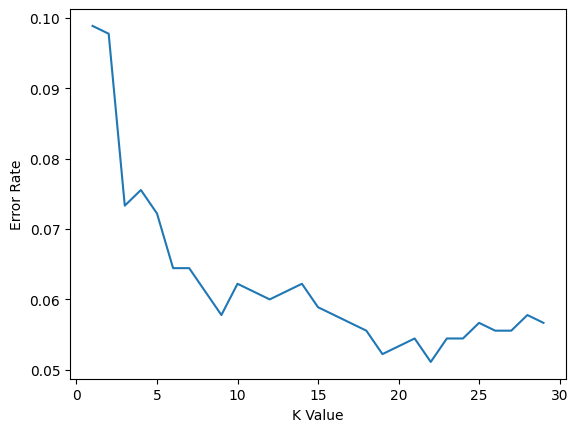

In [49]:
plt.plot(range(1, 30), test_error_rates)
plt.xlabel("K Value")
plt.ylabel("Error Rate")

(0.0, 0.11)

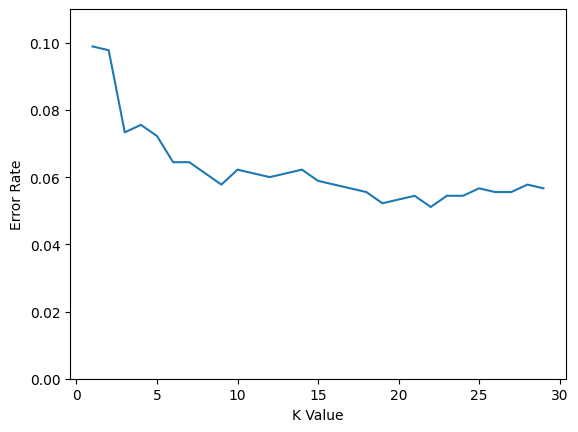

In [50]:
plt.plot(range(1, 30), test_error_rates)
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.ylim(0, 0.11)

In [51]:
#PIPELINE -> GridSearch CV

In [52]:
scaler = StandardScaler()

In [53]:
knn = KNeighborsClassifier()

In [ ]:
knn.get_params().keys()

#parameters of the KNeighborsClassifier

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [ ]:
operations = [('scaler', scaler), ('knn', knn)]

#operations is used to create a pipeline 

In [57]:
from sklearn.pipeline import Pipeline

In [58]:
pipeline = Pipeline(operations)

In [59]:
from sklearn.model_selection import GridSearchCV

In [80]:
k_values = list(range(1, 30))

In [75]:
#param_grid = {'n_neighbors': k_values}

In [81]:
param_grid = {'knn__n_neighbors': k_values}

#n_neighbors is a key in the knn model in the pipeline

In [82]:
full_cv_classifier = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

#inserting the pipeline into the GridSearchCV

In [83]:
full_cv_classifier.fit(X_train, y_train)

#as we are using a pipeline, we don't need to scale the data before fitting it to the model
#since pipeline automatically scales the data before fitting it to the model

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'knn__n_neighbors': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [84]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=20))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=20),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 20,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [85]:
full_pred = full_cv_classifier.predict(X_test)

In [86]:
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



In [87]:
new_patient = [[3.8, 6.4]]

In [88]:
full_cv_classifier.predict(new_patient)

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [89]:
full_cv_classifier.predict_proba(new_patient)

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.9, 0.1]])

In [90]:
full_cv_classifier

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'knn__n_neighbors': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True
